## Netflix Notebook
- @RodrigoLaraG
- 25/07

## Introdução

### Descritivo dos Datasets

#### Credits
- `person_id`
- `id` = movie-show id
- `name`
- `character` = só p/ `character-ACTOR`
- `role` = ACTOR/DIRECTOR

#### Titles
- `id` = movie-show id
- `title`
- `type` = SHOW/MOVIE
- `description` = descrição (max len?) ~20missing
- `release year`
- `age_certification` = 11 tipos, não ordenados, procurar entender qual a ordem ~2600 missing
- `runtime` = duração 
- `genres` = ? gêneros ?, fazer a separação
- `production_countries` = ? países possíveis ?, fazer a separação (os menos colocar outros?), coluna p/ coproduções
- `seasons` = temporadas, só válido p/ `type-SHOW`
- `imdb_id` = ??? ~450missing
- `imdb_score` = nota imdb ~500missing
- `imdb_votes` = quantidade de avaliações??? ~550missing
- `tmdb_popularity` = ??? ~100missing
- `tmdb_score` = nota ~300missing

imdb = Internet Movie Database

tmdb = The Movie Database

## Perguntas a serem respondidas

Uma lista de possíveis perguntas/explorações a serem feitas em cima desses dados, acabam sendo algumas possíveis curiosidades

- Qual Ator/Diretor mais bem/mal avaliado?
- Qual Ator/Diretor com a carreira mais longínqua?
- Qual a combinação de Ator/Diretor - Ator/Ator mais frequentes?
- Qual Ator/Diretor participou de mais filmes/séries?
- Qual Ator/Diretor mais popular (em questão de soma de avaliações)? e Qual o score-médio?

.
- Qual o gênero mais aclamado? Existe correlação?
- Qual o gênero mais popular? Existe Correlação?
- Qual é a combinação de gêneros mais aclamado/popular/comum?
- Quais os países mais prolíficos? e os mais aclamados
- Qual a combinação de coproduções mais comum/popular/aclamada
- Existe correlação entre # temporadas e avaliação? e popularidade?
- Qual a divisão de filmes/series por gênero? e por classificação etária?
- Existe correlação entre classificação etária e avaliação? e duração?
- Qual a progressão da avaliação/duração/etc com os anos? 
- Existe correlação entre popularidade e avaliação?
- Existe coralação entre gênero e # temporadas?
- Qual a correlação entre notas do imdb/tmdb, e entre popularidade-votes?


## Importação dos Dados

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
credits = pd.read_csv("credits.csv")
titles = pd.read_csv("titles.csv")

In [5]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [6]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [9]:
# Divisão entre ACTOR/DIRECTOR dos créditos
credits.role.value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

In [10]:
#quantidade de pessoas únicas (ps. será q tem mts pessoas duplicadas?)
credits.person_id.nunique()

53956

In [11]:
# Divisão entre MOVIE/SHOW
titles.type.value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

### Data Tidying

#### Criando uma get_dummies dos generos, pra considerar na hora de avaliar

total de gêneros = 19

In [14]:
genres = titles.genres.str.rstrip("]")
genres = genres.str.lstrip("[")
genres = genres.str.get_dummies(", ")
genres.head()

,'action','animation','comedy','crime','documentation','drama','european','family','fantasy','history','horror','music','reality','romance','scifi','sport','thriller','war','western'
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
genres.sum().sort_values(ascending = False)

'drama'            2901
'comedy'           2269
'thriller'         1178
'action'           1053
'romance'           958
'documentation'     910
'crime'             891
'animation'         665
'fantasy'           631
'family'            622
'scifi'             587
'european'          460
'horror'            380
'music'             238
'history'           233
'reality'           223
'sport'             166
'war'               149
'western'            44
dtype: int64

#### Criando uma get_dummies dos production_countries, pra considerar na hora de avaliar

qual limite uar p/ considerar um país como "other" ?

In [17]:
countries = titles.production_countries.str.rstrip("]")
countries = countries.str.lstrip("[")
countries = countries.str.get_dummies(", ")
countries.head()

,'AE','AF','AL','AO','AR','AT','AU','BD','BE','BF',...,'TZ','UA','US','UY','VA','VE','VN','XX','ZA','ZW'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
countries.sum().sort_values(ascending = False)

'US'    2327
'IN'     629
'GB'     406
'JP'     291
'FR'     248
        ... 
'MU'       1
'MW'       1
'MZ'       1
'NA'       1
'ZW'       1
Length: 107, dtype: int64

Quantidades de paises com mais de X filmes

- \>10 = 50
- \>20 = 35
- \>50 = 20

IN é international?

In [24]:
# países com mais instâncias no dataset
countries.sum()[countries.sum() > 50].sort_values(ascending = False)

'US'    2327
'IN'     629
'GB'     406
'JP'     291
'FR'     248
'CA'     216
'KR'     216
'ES'     212
'DE'     139
'MX'     123
'CN'     104
'BR'      98
'PH'      85
'AU'      83
'IT'      81
'TR'      80
'NG'      75
'AR'      71
'TW'      61
'ID'      58
dtype: int64

In [26]:
# criando indexes p/ separação dos países menos populares em um "OTHER"
top20 = countries.sum()[countries.sum() > 50].index
excluded20 = countries.sum()[countries.sum() < 50].index

In [51]:
# função merda pq a lambda não esta indop sei la pq
def others(row):
    for x in row:
        if x >= 1 : return 1
        else: return 0

In [ ]:
countries["OTHERS"] = countries[excluded20].apply(others,  axis = 1 )

In [56]:
# Cria um novo df onde todos os paises com menos de 50 filmes são classificados como "other"
countries20 = pd.concat([countries[top20], countries.OTHERS], axis = 1)
countries20.head()

,'AR','AU','BR','CA','CN','DE','ES','FR','GB','ID',...,'IT','JP','KR','MX','NG','PH','TR','TW','US',OTHERS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Ordenando/entendendo o age_certification

entender se filmes antigos/estrangeiros não tem a certificação etária, descobrir qual a ordenação p/ os que tem

In [58]:
# Classificações etárias, qual a ordem delas?
titles.age_certification.value_counts()

TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: age_certification, dtype: int64

##### Significados das classificações etárias

*Show de tv*

- TV-Y : INFANTIL
- TY-Y7 : INFANTIL +7
- TV-G : TODOS OS PÚBLICOS
- TV-PG : ORIENTAÇÃO PARENTAL
- TV-14 : MAIORES DE 14
- TV-MA : MAIORES DE 17

*Filmes*
- G : TODOS OS PUBLICOS
- PG : ORIENTAÇÃO PARENTAL
- PG-13 : MAIORES DE 13
- R : MAIORES DE 17
- NC-17 : ADULTOS

**Proposta de Junção/Equivalência**
- TV-Y + TV-Y7
- G == TV-G
- TV-PG == PG
- TV-14 == PG-13
- TV-MA == R == NC-17 

##### Quais as instâncias que não possuem restrição etária?

In [64]:
titles[titles.age_certification.isna()].release_year.value_counts()

2019    466
2020    408
2018    352
2021    345
2017    306
       ... 
1966      1
1968      1
1992      1
1978      1
1961      1
Name: release_year, Length: 62, dtype: int64

In [65]:
titles[titles.age_certification.isna()].production_countries.value_counts()

['US']                623
['IN']                374
[]                    154
['KR']                 83
['ES']                 79
                     ... 
['PH', 'FO']            1
['AE', 'US', 'LB']      1
['GL', 'FR']            1
['ES', 'AR']            1
['DK', 'GR', 'GB']      1
Name: production_countries, Length: 292, dtype: int64

vou fazer uma rápida EDA nop que já tenho, antes de voltar aqui

## EDA

#### Exploração Inicial das variáveis numericas


<AxesSubplot:xlabel='release_year', ylabel='Count'>

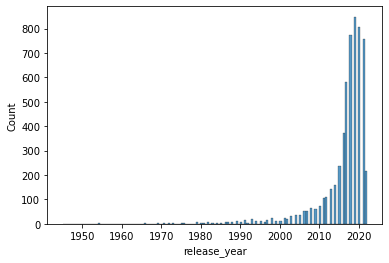

In [66]:
sns.histplot(titles, x = "release_year")

<AxesSubplot:xlabel='release_year', ylabel='Count'>

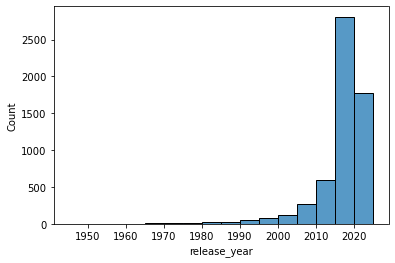

In [68]:
sns.histplot(titles, x = "release_year", binwidth=5)

##### release_year comments

- Os dados pesam mais p/ filmes/show mais novos (a partir de ~2015)
- Filmes/shows muito novos ainda não foram incluídos (depois de ~2020)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

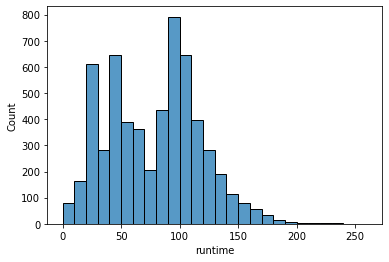

In [70]:
sns.histplot(titles, x = "runtime", binwidth=10)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

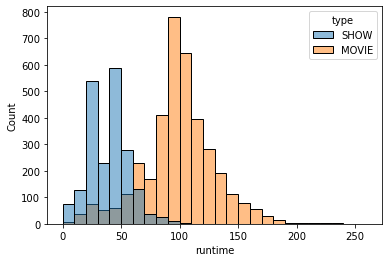

In [73]:
sns.histplot(titles, x = "runtime", binwidth=10, hue="type")

<AxesSubplot:xlabel='runtime', ylabel='Count'>

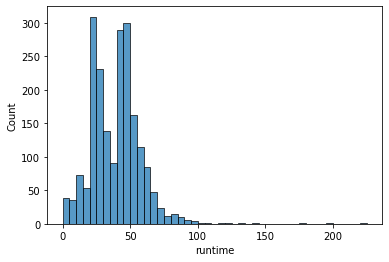

In [74]:
sns.histplot(titles[titles.type == "SHOW"], x = "runtime", binwidth=5)

<AxesSubplot:xlabel='runtime', ylabel='Count'>

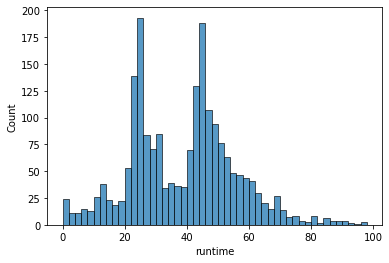

In [76]:
sns.histplot(titles[(titles.type == "SHOW")&(titles.runtime < 100)], x = "runtime", binwidth=2)

##### runtime comments

- Existe uma diferença entre a duração de filmes/shows
- A duração de shows é bimodal, considerando que existem dois tipos "padrão de duração"     
    - (26-28)min e (44-46)min

<AxesSubplot:xlabel='seasons', ylabel='count'>

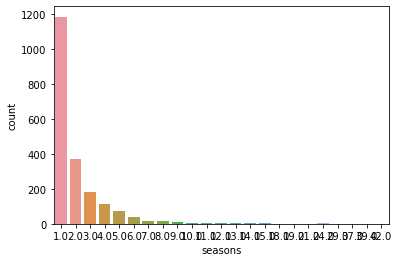

In [86]:
sns.countplot(data = titles, x = "seasons")

<AxesSubplot:xlabel='seasons', ylabel='count'>

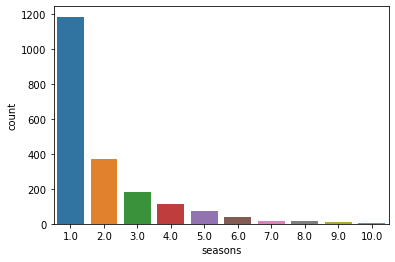

In [87]:
sns.countplot(data = titles[titles.seasons < 11], x = "seasons")

Qual a % de shows com apenas 1 temp, e com mais de 8?

In [83]:
# apenas 1 temp
100*titles.seasons[titles.seasons == 1].count()/titles.seasons.count()

57.98729848558867

In [85]:
# mais de 8 temporadas
100*titles.seasons[titles.seasons > 8].count()/titles.seasons.count()

2.1006350757205667

### Correlações de avaliações/popularidade/etc

<AxesSubplot:ylabel='Density'>

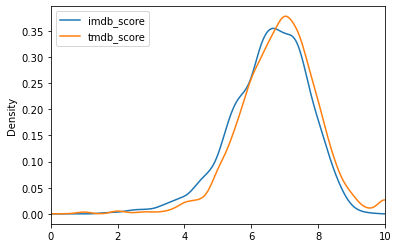

In [106]:
# comparação do perfil de notas entre imdb e tmdb
titles[["imdb_score", "tmdb_score"]].plot.kde(xlim = [0, 10])

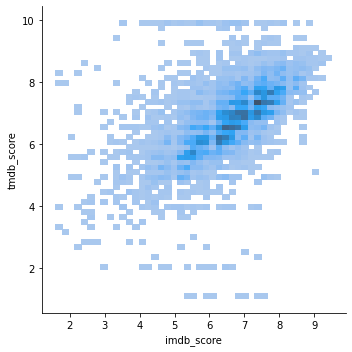

In [93]:
# comparação entre perfil de notas entre imdb e tmdb
sns.displot(data = titles, x = "imdb_score", y = "tmdb_score")

In [ ]:
titles[["imdb_votes", "tmdb_popularity"]].describe()

,imdb_votes,tmdb_popularity
count,5.267000e+03,5712.000000
mean,2.340719e+04,22.525660
std,8.713432e+04,68.849177
min,5.000000e+00,0.009442
25%,5.210000e+02,3.155250
50%,2.279000e+03,7.478000
75%,1.014400e+04,17.775750
max,2.268288e+06,1823.374000


In [ ]:
titles[["imdb_votes", "tmdb_popularity"]].quantile(0.9)

imdb_votes         48469.4000
tmdb_popularity       45.5213
Name: 0.9, dtype: float64

In [139]:
titles[["imdb_votes", "tmdb_popularity"]].quantile(0.95)

imdb_votes         115896.10000
tmdb_popularity        79.14585
Name: 0.95, dtype: float64

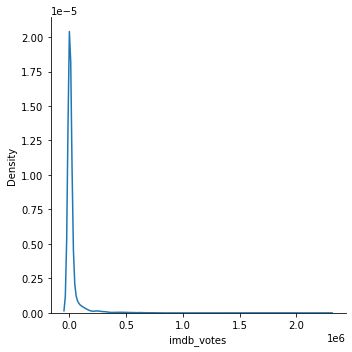

In [97]:
# full hist plot for imdb_votes, extremely right skewed
sns.displot(data = titles, x = "imdb_votes", kind = "kde")

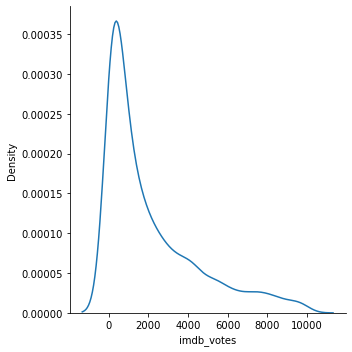

In [100]:
# 75% quantile hist plot for imdb_votes, right skewed
sns.displot(data = titles[titles.imdb_votes < 10000], x = "imdb_votes", kind = "kde")

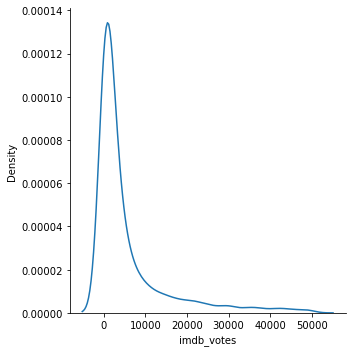

In [103]:
# 90% quantile hist plot for imdb_votes, highly right skewed
sns.displot(data = titles[titles.imdb_votes < 50000], x = "imdb_votes", kind = "kde")

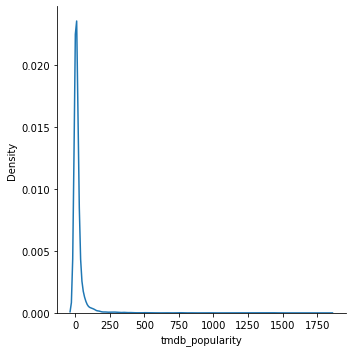

In [98]:
# full hist plot for tmdb_popularity, extremely right skewed
sns.displot(data = titles, x = "tmdb_popularity", kind = "kde")

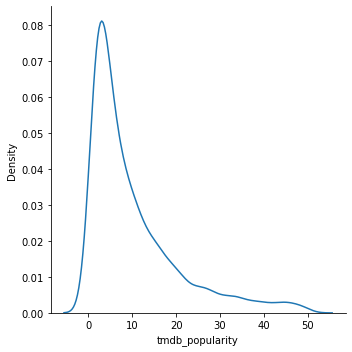

In [102]:
# 90% quantile hist plot for tmdb_popularity, highly right skewed
sns.displot(data = titles[titles.tmdb_popularity < 50], x = "tmdb_popularity", kind = "kde")

##### Transformação Log de `imdb_votes` e `tmdb_popularity`

In [125]:
from sklearn.preprocessing import PowerTransformer
log_transformer1 = PowerTransformer()
log_transformer2 = PowerTransformer()

imdb_votes_log = log_transformer1.fit_transform(np.reshape(titles.imdb_votes.values, (-1,1)))
tmdb_pop_log = log_transformer2.fit_transform(np.reshape(titles.tmdb_popularity.values, (-1,1)))

In [135]:
titles["imdb_votes_log"] = imdb_votes_log
titles["tmdb_pop_log"] = tmdb_pop_log

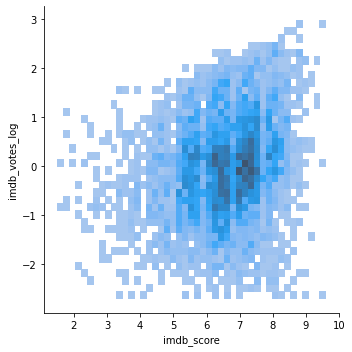

In [136]:
sns.displot(data = titles, x = "imdb_score", y = "imdb_votes_log")

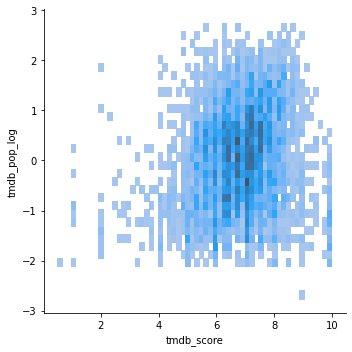

In [137]:
sns.displot(data = titles, x = "tmdb_score", y = "tmdb_pop_log")

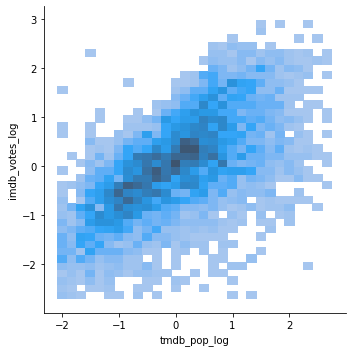

In [138]:
sns.displot(data = titles, x = "tmdb_pop_log", y = "imdb_votes_log")

#### Considerações sobre Scores e Qtd. Votos/Popularidade

- A escala de de grandezas do `imdb_votes` é grande (0-2mi), o que torna necessário usar uma transformação p/ comparação
- Já a popularidade no tmdb é fruto de algum algoritmo, apesar disso ela também tem seus itens mais popularidades com `popularidade` muito maior
- O tmdb tem um perfil de notas ligeriamente mais "generoso" que o imdb, além de apresentar alguns filmes com "nota 10", da mesma maneira parece apresentar alguns filmes "nota 0"

.
- P/ o `imdb`
    - filmes com mais avaliações tendem a ser melhor avaliados
    - filmes que tem uma quantidade de avaliações medianas tendem a ter notas mais "medianas" (6-7)
    - outra característica é que apresentam uma amplitude de notas maior (apresentam também as piores notas)
    - filmes com poucas avaliações aparentemente não tem uma nota mediana clara

.
- P/ o `tmdb`
    - ao contrário do imdb, of filmes com mais avaliações não aparentam ser melhor avaliados
    - outra característica que diferencia os dois, é que existem muito menos filmes com notas inferiores à ~5
    - os filmes menos avaliados também apresentam modas nas notas "inteiras", além de apresentar alguns filmes "nota 10"

.
- Em relação à medida de popularidade entre os dois:
    - ambos possuem "outliers", ou seja, filmes que são populares em uma plataforma, mas não na outra, mas aparentemente o tmdb apresenta uma quantidasde maior dos mesmos


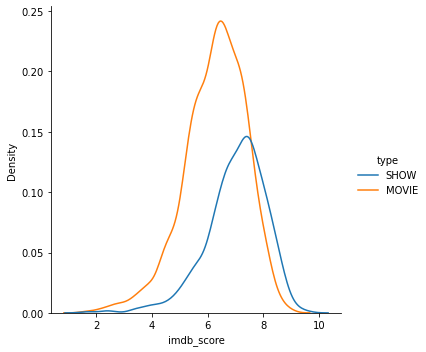

In [143]:
sns.displot(data = titles, x = "imdb_score", hue = "type", kind="kde")

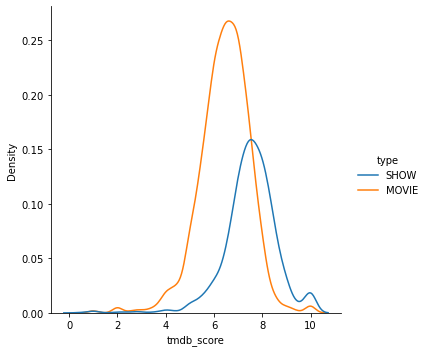

In [144]:
sns.displot(data = titles, x = "tmdb_score", hue = "type", kind="kde")

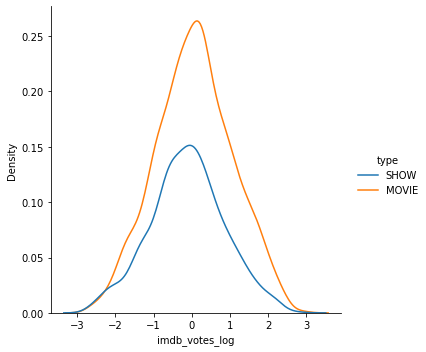

In [145]:
sns.displot(data = titles, x = "imdb_votes_log", hue = "type", kind="kde")

#### Consluões sobre influência de `show/movie` nas avaliações

Tanto para `imdb` quanto para `tmdb` há uma diferençã significativa no perfil das avaliações, em ambos a média para filme está em torno de 6,5, enquanto para séries, fica mais próximo de 7,5

Uma diferença é que as avaliações no `tmdb` caem mais abruptamente após nota 4 p/ filmes, e 5 p/ séries

Em questão de quantidade de avaliações, séries tendem a ser menos avaliadas em ambos os casos

# TO-DO

- Join entre `credits` e `titles` p/ avaliação agregadas de pessoas
    - melhores avaliados, mais populares, etc
- criar um `index` p/ as variaveis numericas/categoricas
    - fazer um concat entre o `titles` + `countries` 
    - fazer um concat entre o `titles` + `genres`
- Fazer avaliação de `score`, `runtime`, etc com `hue` = `countries/genres`
- Fazer uma função pra descobrir combinação de `countries/genres` mais populares/aclamados
- Talvez fazer bins p/ avaliações, ver progressão temporal e tals
- Diminuir qtd. de `classificações` p/ avaliar influência
- Pensar nos machine-learnings possíveis
    - previsão de avaliação baseado em ator/diretor/gênero
    - algo de recomendação (como?)
    - ???